### 1 - PREPARAÇÃO E CARREGAMENTO DOS DADOS ###

In [11]:
import matplotlib as plt
import seaborn as sns
import numpy
import pandas as pd

In [2]:
try: 
    df = pd.read_csv("flight_data_2024.csv")
    print("Arquivo carregado com sucesso!")

except FileNotFoundError:
    print("ERRO: Arquivo não encontrado")

print(f"Dataset carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.")

Arquivo carregado com sucesso!
Dataset carregado com 1048575 linhas e 18 colunas.


### 2 - INSPEÇÃO E QUALIDADE DOS DADOS ###

In [32]:
print("\n --- 2.1. Primeiras linhas ---")
display(df.head())


 --- 2.1. Primeiras linhas ---


,year,month,day_of_month,day_of_week,fl_date,origin,origin_city_name,origin_state_nm,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay
0,2024,1,1,1,1/1/2024,JFK,"New York, NY",New York,1247.0,31.0,1318.0,1442.0,7.0,0,84.0,509,0,0
1,2024,1,1,1,1/1/2024,MSP,"Minneapolis, MN",Minnesota,1001.0,20.0,1021.0,1249.0,6.0,0,88.0,622,0,0
2,2024,1,1,1,1/1/2024,JFK,"New York, NY",New York,1411.0,21.0,1432.0,1533.0,8.0,0,61.0,288,0,0
3,2024,1,1,1,1/1/2024,RIC,"Richmond, VA",Virginia,1643.0,13.0,1656.0,1747.0,12.0,0,51.0,288,0,0
4,2024,1,1,1,1/1/2024,DTW,"Detroit, MI",Michigan,1010.0,21.0,1031.0,1016.0,4.0,0,45.0,237,0,0


In [38]:
print(f"--- Descrição dos dados ---")
display(df.describe().T)

--- Descrição dos dados ---


,count,mean,std,min,25%,50%,75%,max
year,1048575.0,2024.000000,0.000000,2024.0,2024.0,2024.0,2024.0,2024.0
month,1048575.0,1.478081,0.499520,1.0,1.0,1.0,2.0,2.0
day_of_month,1048575.0,15.305120,8.585503,1.0,8.0,15.0,23.0,31.0
day_of_week,1048575.0,3.893483,2.010038,1.0,2.0,4.0,6.0,7.0
dep_time,1026022.0,1325.073671,497.299032,1.0,911.0,1323.0,1736.0,2400.0
taxi_out,1025450.0,18.250121,10.440251,1.0,12.0,15.0,21.0,213.0
wheels_off,1025450.0,1349.995608,498.042601,1.0,929.0,1337.0,1750.0,2400.0
wheels_on,1024898.0,1476.155761,519.868238,1.0,1058.0,1510.0,1914.0,2400.0
taxi_in,1024898.0,8.082517,6.512591,1.0,4.0,6.0,9.0,444.0
cancelled,1048575.0,0.022226,0.147419,0.0,0.0,0.0,0.0,1.0


In [ ]:
print("\n --- 2.3. Contagem de valores nulos ---")
nulos = df.isnull().sum().sort_values(ascending=False)
nulos_percentual = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
df_nulos = pd.DataFrame({'Nulos': nulos, 'Percentual': nulos_percentual})
print(df_nulos[df_nulos['Nulos'] > 0]) # Exibe apenas colunas com nulos


 --- 2.3. Contagem de valores nulos ---
            Nulos  Percentual
air_time    25751    2.455809
wheels_on   23677    2.258017
taxi_in     23677    2.258017
taxi_out    23125    2.205374
wheels_off  23125    2.205374
dep_time    22553    2.150824


C:\Users\phein\AppData\Local\Temp\ipykernel_37372\3441574223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contagem_mensal.index, y=contagem_mensal.values, palette="viridis")


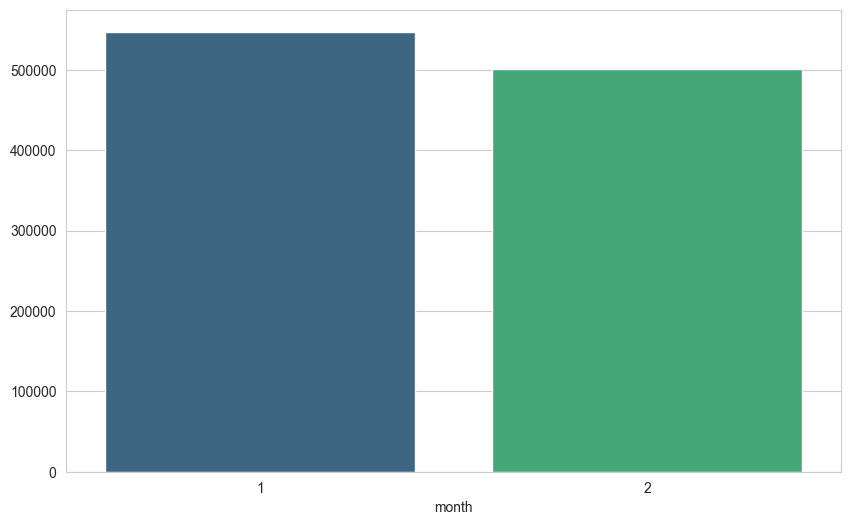

In [15]:
# 2. Contagem das Observações por Mês
    # value_counts() conta a frequência e sort_index() garante a ordem correta dos meses (1, 2, 3...)
contagem_mensal = df['month'].value_counts().sort_index()

# 3. Criação do Gráfico de Barras
ax = sns.barplot(x=contagem_mensal.index, y=contagem_mensal.values, palette="viridis")


### Inferencias iniciais ###

- O Dataset refere-se ao histórico de voos de 2024, porém só possui informações de vôos nos meses de Janeiro e Fevereiro (1 e 2);
- As informaçoes nulas do dataset se concentram nas variáveis associadas a tempo.